# Câu 1: Boostrap Sampling Method
Ước tính phân bố lấy mẫu của 1 thông số thông kê,
ở bài này chúng ta sẽ dùng thông số thống kê là độ lệch chuẩn (STD)

In [11]:
# Trước hết, ta import các thư viện 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

Để làm việc với file csv ta dùng các hàm của pandas

In [12]:
# Đọc dữ liệu từ dataset
data = pd.read_csv('BIKE DETAILS.csv') 
print(data.head(5))

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


Chọn 1 đặc trưng bất kì của dataset để thống kê, ở đây mình chọn đặc trưng là 
'selling_price'

In [13]:
# Trích xuất dữ liệu từ đặc trưng thành array
arrData = data['selling_price'].to_numpy()
print(arrData[:5])

[175000  45000 150000  65000  20000]


## Create Function 
### Input parameter : n(sample size), M(number of bootstrap samplings), x (confidence interval in %) 
### Output : figure of histogram, range of confidence interval



In [14]:
def BootstrapMethod(n, M, x):
    arrSTD = [] # Tạo ra mảng rỗng để chứa giá trị STD của từng row
    
    for _ in range(M): # Thực hiện M lần lấy mẫu
        rowData = arrData[np.random.randint(len(data), size= n)] # Tạo ra 1 mảng với độ dài là n, các giá trị được chọn ngẫu nhiên từ dataset
        stdRow = np.std(rowData) # Tính STD từng row
        arrSTD.append(stdRow) # Lưu lại các giá trị
        
    p = ((1.0-x)/2.0) * 100
    lower =  np.percentile(arrSTD, p)
    
    p = (x+((1.0-x)/2.0)) * 100
    upper =  np.percentile(arrSTD, p)
    
    confidenceIntervalRange = np.array([lower,upper],dtype=int)
    
    sns.displot(arrSTD, kde = True) # plot phân bố các giá trị STD đã lưu trước đó
    plt.plot([lower,lower],[0, 650],color= "r")
    plt.plot([upper, upper],[0, 650], color= "r")
    plt.annotate(round(lower), [lower, 180])
    plt.annotate(round(upper), [upper, 180])
    #plt.axvline(x= lower, color='r') # plot đầu khoảng tin cậy
    #plt.axvline(x= upper, color='r') # plot đuôi khoảng tin cậy
    plt.show()
    
    return confidenceIntervalRange # trả về mảng chứa giá trị ở đầu cuối của khoảng tin cậy

Gọi hàm

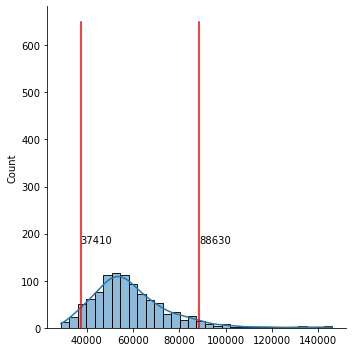

Range of Confidence Interval : [37409 88629]


In [15]:
print("Range of Confidence Interval :", BootstrapMethod(10, 1000,0.9))

## NHẬN XÉT:
### Kết quả cho ta thấy được rằng độ lệch chuẩn về giá cả của các loại xe được tập trung khoảng 10000 đến 110000. 
### Các tham số ảnh hưởng khá nhiều đến kết quả:
- Sample size: khi càng tăng size của sample ta sẽ tính được giá trị độ lệch chuẩn càng lớn
- Number of bootstrap samplings : càng tăng thì sẽ cho ra kết quả với độ mịn cao hơn vì tần xuất lặp lại của các giá trị tăng
- CI : loại bỏ được các giá trị nằm ngoài phạm vi được xét
### Ý kiến cá nhân
- Không nên chọn size của sample quá lớn ( < 100)
- Nên sử dụng giá trị M lớn nhất có thể tuỳ thuộc vào sample size (ảnh hướng đến độ phức tạp)
- CI: nên sử dụng khoảng 90% nếu M lớn và 95% nếu M nhỏ hơn